## Exploratory Data Analysis - DNA-Binding Proteins

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Allow multiple outputs from each cell.

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Load in train and test datasets.

In [3]:
df_train = pd.read_csv("../data/dna_binding/train.csv")
df_test = pd.read_csv("../data/dna_binding/test.csv")

print(f"Train dataset shape: {df_train.shape}")
print(f"Test dataset shape: {df_test.shape}")

train_per = round(100*(df_train.shape[0]/(df_train.shape[0]+df_test.shape[0])))
print(f"Train-test split: {train_per}% Train, {100-train_per}% Test")

Train dataset shape: (14189, 4)
Test dataset shape: (2272, 4)
Train-test split: 86% Train, 14% Test


Take a look at the format of the data.

In [4]:
df_test.head()

,code,sequence,label,origin
0,P27204|1,AKKRSRSRKRSASRKRSRSRKRSASKKSSKKHVRKALAAGMKNHLL...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...
1,P53528|1,MVMVVNPLTAGLDDEQREAVLAPRGPVCVLAGAGTGKTRTITHRIA...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...
2,P52684|1,MKDDINQEITFRKLSVFMMFMAKGNIARTAEAMKLSSVSVHRALHT...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...
3,P10961|1,MNNAANTGTTNESNVSDAPRIEPLPSLNDDDIEKILQPNDIFTTDR...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...
4,P06023|1,MAKPAKRIKSAAAAYVPQNRDAVITDIKRIGDLQREASRLETEMND...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...


In [66]:
df_train.head()
df_train.dtypes
print(f"Unique values of label: {df_train.label.unique()}")

,code,sequence,label,origin
0,Q6A8L0,MSGHSKWATTKHKKAAIDAKRGKLFARLIKNIEVAARLGGGDPSGN...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...
1,Q7V7T9,MIGWLQGQKVEAWQQGTRQGVVLACAGVGYEVQIAPRHLSEMEHGQ...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...
2,Q9ZUP2,MARILRNVYSLRSSLFSSELLRRSVVGTSFQLRGFAAKAKKKSKSD...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...
3,Q2JVG1,MKCPRCGKQEIRVLESRSAEGGQSVRRRRECMSCGYRFTTYERIEF...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...
4,Q9K4Q3,MTKADIIEGVYEKVGFSKKESAEIVELVFDTLKETLERGDKIKISG...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...


code        object
sequence    object
label        int64
origin      object
dtype: object

Unique values of label: [1 0]


In [67]:
df_train.origin.unique()
df_test.origin.unique()

array(['https://github.com/hfuulgb/PDB-Fusion/tree/main/DNA'],
      dtype=object)

array(['https://github.com/hfuulgb/PDB-Fusion/tree/main/DNA'],
      dtype=object)

All sequences come from the same source, so this column can be safely removed.

In [68]:
df_train = df_train.drop("origin", axis=1)
df_test = df_test.drop("origin", axis=1)

Making sure there are no duplicate proteins.

In [69]:
df_train.sequence.duplicated().sum()
df_test.sequence.duplicated().sum()

173

0

In [70]:
df_train[df_train.sequence.duplicated()].sort_values(by="sequence")

,code,sequence,label
13064,Q0VCF9,MAAPPGEYFSVGSQVSCRTCQEQRLQGEVVAFDYQSKMLALKCPSS...,0
13251,B2S532,MAATSAQHIGLQGHGTSRNDRDRRLVRYWLYAVFAVLIAIVMVGGA...,0
10662,P62200,MADQLTDDQISEFKEAFSLFDKDGDGCITTKELGTVMRSLGQNPTE...,0
12717,B1I8K3,MAEITSAKAMARTVRVSPRKSRLVLDNIRGKSVADAIAILTFTPNK...,0
12578,Q02W29,MAEITSAKATAKTVRVSPRKTRLVIDLIRGKRVADAIAILKFTPTK...,0
...,...,...,...
12991,B5XLG8,MVIDKSIPKATAKRLSLYYRIFKRFHADQVEKASSKQIADAMGIDS...,0
7935,P66686,MVKLAFPRELRLLTPAHFTFVFQQPQRAGTPQITILGRLNSLGHPR...,0
9500,A3DB95,MVYSYSEKKRIRKDFGKRPKVLDIPYLLSIQLDSFKKFTDQDPTGE...,0
8304,Q5PLB4,MYAVFQSGGKQHRVSEGQTVRLEKLDIATGETIEFAEVLMIANGEE...,0


In [71]:
df_train[df_train.sequence.duplicated()].label.value_counts()

0    173
Name: label, dtype: int64

Interestingly enough, all of the duplicated proteins are in the negative class - non-dna-binding proteins. 

In [72]:
# Random example of duplicate
df_train.loc[8304].sequence
df_train.loc[14051].sequence
df_train.loc[8304].code
df_train.loc[14051].code

'MYAVFQSGGKQHRVSEGQTVRLEKLDIATGETIEFAEVLMIANGEEVKIGIPFVDGGVIKAEVVAHGRGEKVKIVKFRRRKHYRKQQGHRQWFTDVKITGISA'

'MYAVFQSGGKQHRVSEGQTVRLEKLDIATGETVEFAEVLMIANGEEVKIGVPFVDGGVIKAEVVAHGRGEKVKIVKFRRRKHYRKQQGHRQWFTDVKITGISA'

'Q5PLB4'

'Q31W63'

In [74]:
df_train[df_train.sequence.duplicated(keep=False)].shape
df_train[df_train.sequence.duplicated(keep=False)].code.nunique()

(312, 3)

312

Another interesting discovery: the duplicates all have different codes, despite having identical sequences.

Remove duplicates

In [59]:
df_train = df_train.drop_duplicates(["sequence"])
df_train.shape

(14016, 3)

Check for distribution of classes to identify potential imbalances.

In [61]:
df_train.label.value_counts()
df_test.label.value_counts()
print("Both train and test datasets are almost perfectly balanced between the positive and negative class")

1    7129
0    6887
Name: label, dtype: int64

1    1153
0    1119
Name: label, dtype: int64

Both train and test datasets are almost perfectly balanced between the positive and negative class


Visualizing the distribution of the lengths of sequences in each dataset.

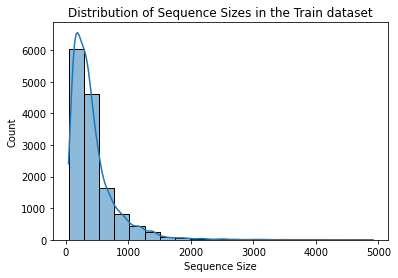

In [62]:
sns.histplot(df_train.sequence.str.len(), bins=20, kde=True);
plt.xlabel("Sequence Size");
plt.title('Distribution of Sequence Sizes in the Train dataset');

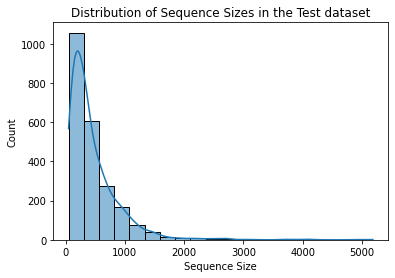

In [63]:
sns.histplot(df_test.sequence.str.len(), bins=20, kde=True);
plt.xlabel("Sequence Size");
plt.title('Distribution of Sequence Sizes in the Test dataset');

In [64]:
train_seq_sizes = df_train.sequence.str.len()
test_seq_sizes = df_test.sequence.str.len()

print(f"Train dataset - mean of sequence sizes: {train_seq_sizes.mean()}")
print(f"Test dataset - mean of sequence sizes: {test_seq_sizes.mean()}")

print(f"Train dataset - smallest sequence size: {train_seq_sizes.min()}")
print(f"Test dataset - smallest sequence size: {test_seq_sizes.min()}")

print(f"Train dataset - largest sequence size: {train_seq_sizes.max()}")
print(f"Test dataset - largest sequence size: {test_seq_sizes.max()}")

Train dataset - mean of sequence sizes: 427.5094891552511
Test dataset - mean of sequence sizes: 459.9806338028169
Train dataset - smallest sequence size: 47
Test dataset - smallest sequence size: 51
Train dataset - largest sequence size: 4911
Test dataset - largest sequence size: 5183
